In [2]:
# Import Libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12, 8)  # Adjust the configuration of the plots we will create

# Read in the data
df = pd.read_csv(r'C:\Users\User\Desktop\Homicide\child_homicide_original.csv')

In [3]:
df

,Entity,Code,Year,"Homicide rate per 100,000 population - Both Sexes - Age 0-19"
0,Albania,ALB,1987,0.212515
1,Albania,ALB,1988,0.497157
2,Albania,ALB,1989,0.427775
3,Albania,ALB,1992,0.508419
4,Albania,ALB,1993,1.464928
...,...,...,...,...
4579,Venezuela,VEN,2012,15.852173
4580,Venezuela,VEN,2013,13.967589
4581,Venezuela,VEN,2014,14.459981
4582,Venezuela,VEN,2015,16.893404


In [4]:
# 1 Checking Completeness of a data
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

Entity - 0.0%
Code - 0.0%
Year - 0.0%
Homicide rate per 100,000 population - Both Sexes - Age 0-19 - 0.0%


In [5]:
# Yes! The data is complete
# 2 Let's check if there are any duplicat rows

# Checking duplicates based on the given columns
# The duplicated method has a keep parameter that allows you to specify which duplicate to mark ('first', 'last', or False to mark all duplicates).
duplicates = df.duplicated(subset=['Entity', 'Code', 'Year'], keep = False)

# Display duplicate rows
duplicate_rows = df[duplicates]
if duplicate_rows.empty:
    print("No duplicates rows!")
else:
    print("Duplicate rows:")
    print(duplicate_rows)

# If you want to drop duplicate rows, use the following line:
# df_no_duplicates = df.drop_duplicates()

# Display the dataframe after dropping duplicates
# print("\nDataFrame after dropping duplicates:")
# print(df_no_duplicates)



No duplicates rows!


In [6]:
# 3 Let's check the data types of clumns. I expect the Entity and Codes columns to be of type string 
df.dtypes

Entity                                                           object
Code                                                             object
Year                                                              int64
Homicide rate per 100,000 population - Both Sexes - Age 0-19    float64
dtype: object

In [7]:
# In pandas, an "object" type in a DataFrame refers to columns that contain string (text) or mixed data types. Here’s a more detailed explanation:
# String Data: Columns in pandas are often of type "object" when they contain strings. This includes columns that contain text data, such as names, 
# descriptions, or categorical variables represented as strings.
# Mixed Data Types: If a column contains a mixture of data types (e.g., strings, integers, floats), pandas will assign the "object" type to 
# accommodate all possible data types.

# So we good!
# 4 Let's drop rows with 0 in the Homicide Rate column
df = df[df['Homicide rate per 100,000 population - Both Sexes - Age 0-19'] != 0]
df

,Entity,Code,Year,"Homicide rate per 100,000 population - Both Sexes - Age 0-19"
0,Albania,ALB,1987,0.212515
1,Albania,ALB,1988,0.497157
2,Albania,ALB,1989,0.427775
3,Albania,ALB,1992,0.508419
4,Albania,ALB,1993,1.464928
...,...,...,...,...
4579,Venezuela,VEN,2012,15.852173
4580,Venezuela,VEN,2013,13.967589
4581,Venezuela,VEN,2014,14.459981
4582,Venezuela,VEN,2015,16.893404


In [8]:
# 5 I want to be able to display all rows and columns information.
# But, for the purposes of convenience while looking at the code later, I will comment them out.
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
pd.reset_option('^display.', silent=True)
df

,Entity,Code,Year,"Homicide rate per 100,000 population - Both Sexes - Age 0-19"
0,Albania,ALB,1987,0.212515
1,Albania,ALB,1988,0.497157
2,Albania,ALB,1989,0.427775
3,Albania,ALB,1992,0.508419
4,Albania,ALB,1993,1.464928
...,...,...,...,...
4579,Venezuela,VEN,2012,15.852173
4580,Venezuela,VEN,2013,13.967589
4581,Venezuela,VEN,2014,14.459981
4582,Venezuela,VEN,2015,16.893404


In [10]:
# 6 I forgot to rename the Homicide rate column. It is too long and inconvenient
df.rename(columns={'Entity': 'Country'}, inplace=True)
df.rename(columns={'Homicide rate per 100,000 population - Both Sexes - Age 0-19': 'Homicide Rate'}, inplace=True)
df

C:\Users\User\AppData\Local\Temp\ipykernel_18244\2465916173.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Entity': 'Country'}, inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_18244\2465916173.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Homicide rate per 100,000 population - Both Sexes - Age 0-19': 'Homicide Rate'}, inplace=True)


,Country,Code,Year,Homicide Rate
0,Albania,ALB,1987,0.212515
1,Albania,ALB,1988,0.497157
2,Albania,ALB,1989,0.427775
3,Albania,ALB,1992,0.508419
4,Albania,ALB,1993,1.464928
...,...,...,...,...
4579,Venezuela,VEN,2012,15.852173
4580,Venezuela,VEN,2013,13.967589
4581,Venezuela,VEN,2014,14.459981
4582,Venezuela,VEN,2015,16.893404


In [11]:
# 7 Let's ensure that numerical columns are in a consistent format (e.g., not mixed with text or special characters).
# This is a part of Data Cleaning
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# Convert 'Homicide rate per 100,000 population - Both Sexes - Age 0-19' column to numeric
df['Homicide Rate'] = pd.to_numeric(df['Homicide Rate'], errors='coerce')

# let's check for missing data again
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))


Country - 0.0%
Code - 0.0%
Year - 0.0%
Homicide Rate - 0.0%


C:\Users\User\AppData\Local\Temp\ipykernel_18244\3747142956.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
C:\Users\User\AppData\Local\Temp\ipykernel_18244\3747142956.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Homicide Rate'] = pd.to_numeric(df['Homicide Rate'], errors='coerce')


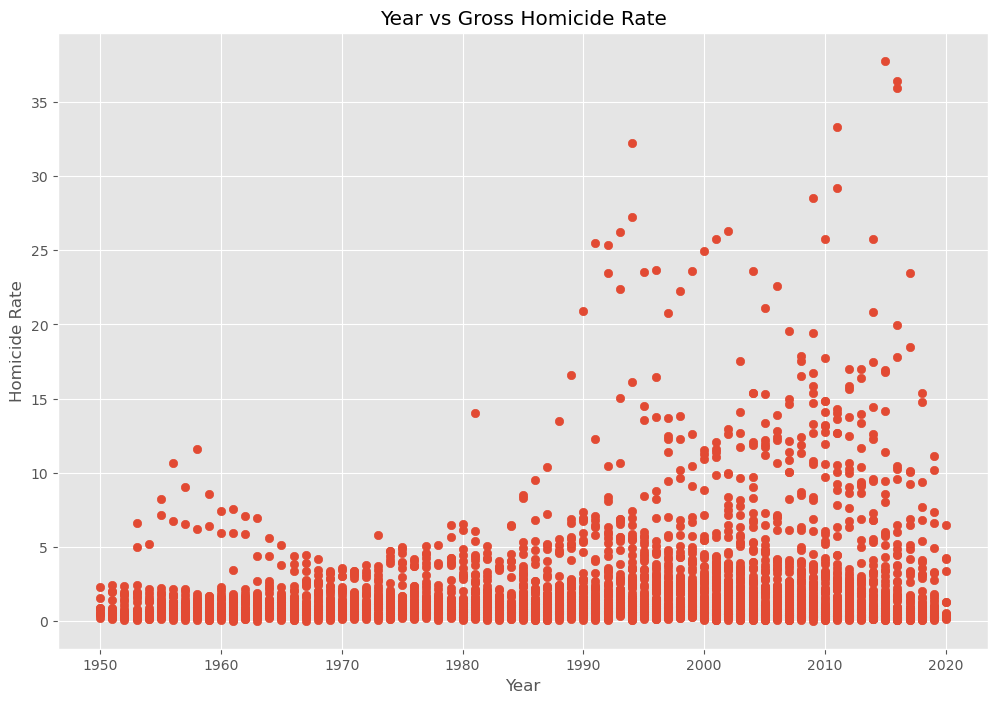

In [12]:
# Yes! There were no "unclean" data in the Year and Homicide Rate columns
# 8 Let's build a scatterplot to visually identify trends
# There migh be a correllation between Homicide Rate and Years (guess)
plt.scatter(x = df['Year'], y = df['Homicide Rate'])
plt.title('Year vs Gross Homicide Rate')
plt.xlabel('Year')
plt.ylabel('Homicide Rate')
plt.show()

<Axes: xlabel='Year', ylabel='Homicide Rate'>

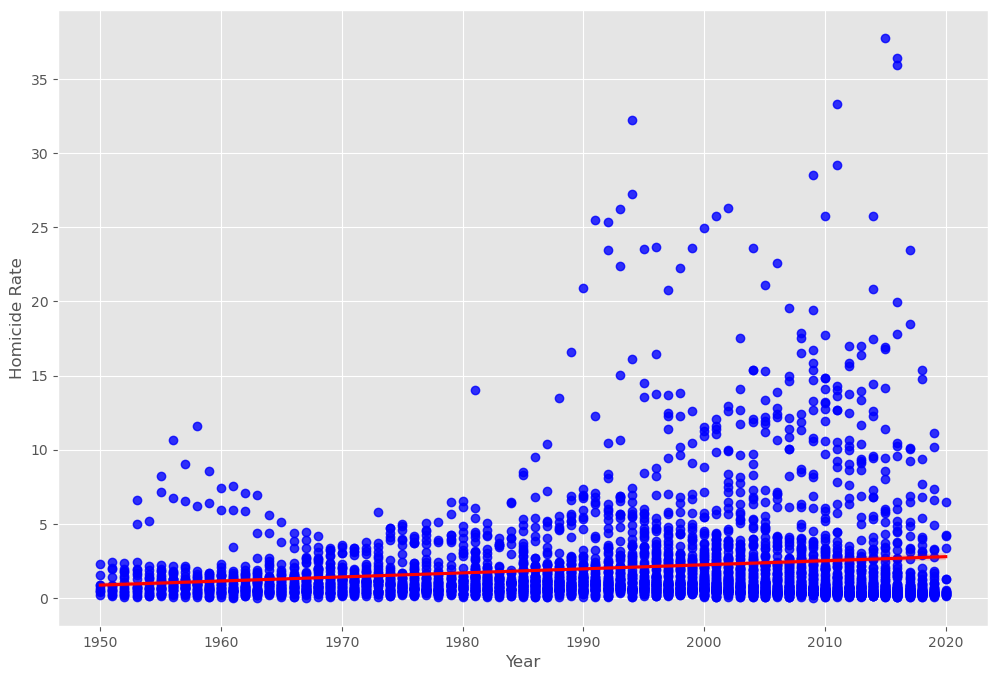

In [13]:
# It looks like in the recent 20-30 years, the Homicide Rate has steadily increased across the globe
# 9 Let's plot the Country vs Homicide Rate seaborn 
sns.regplot(x = 'Year', y = 'Homicide Rate', data = df, scatter_kws = {"color" : "blue"}, line_kws = {"color" : "red"})

In [14]:
# 10 Let's start looking at correlation
numeric_df = df.select_dtypes(include=[float, int])
correlation_matrix = numeric_df.corr(method='pearson')
correlation_matrix
#Types of correlation: pearson(default), kendall, spearman

,Year,Homicide Rate
Year,1.000000,0.147117
Homicide Rate,0.147117,1.000000


In [15]:
# There is not that much correlation between year and homicide rate. 
# 11 Let's look at the correlation between countries and homicide rate
# I have converted the country names to codes to be able to work with int and float types to make the process
# of finding correlation easier
df_numerized = df.copy()
for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
df_numerized


,Country,Code,Year,Homicide Rate
0,0,0,1987,0.212515
1,0,0,1988,0.497157
2,0,0,1989,0.427775
3,0,0,1992,0.508419
4,0,0,1993,1.464928
...,...,...,...,...
4579,113,112,2012,15.852173
4580,113,112,2013,13.967589
4581,113,112,2014,14.459981
4582,113,112,2015,16.893404


In [16]:
df_numerized.dtypes

Country             int8
Code                int8
Year               int64
Homicide Rate    float64
dtype: object

In [17]:
correlation_matrix2 = df_numerized.corr(method='pearson')
correlation_matrix2
#Types of correlation: pearson(default), kendall, spearman

,Country,Code,Year,Homicide Rate
Country,1.000000,0.846460,-0.010209,-0.063220
Code,0.846460,1.000000,0.045244,0.035031
Year,-0.010209,0.045244,1.000000,0.147117
Homicide Rate,-0.063220,0.035031,0.147117,1.000000


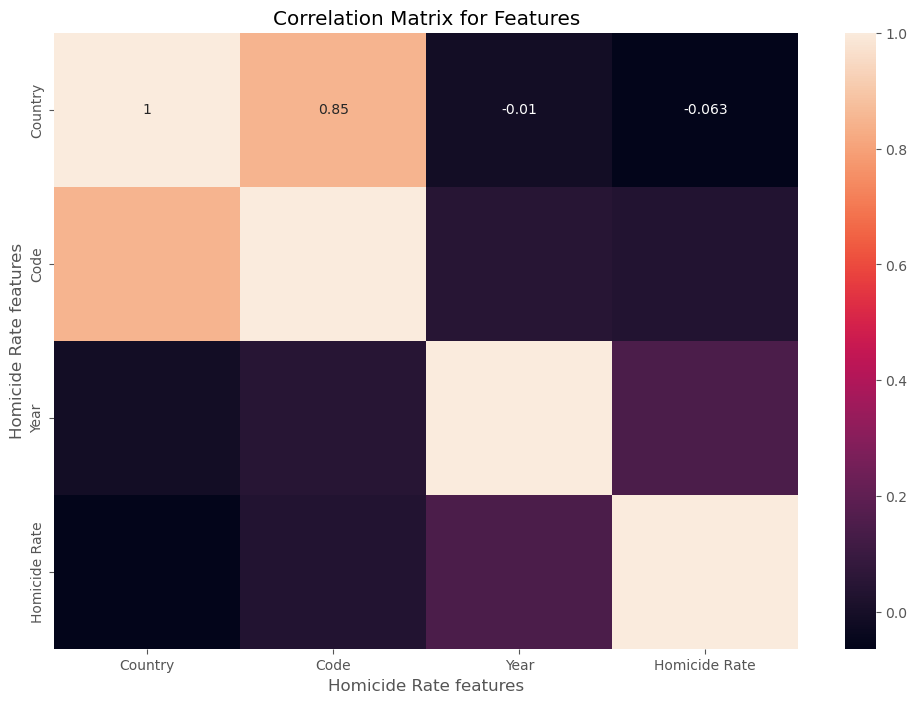

In [18]:
# Contrary to my expectations, there was not a correlation between Homicide Rate and Country.
# There is though a correlation between homizide rate and year
# 12 Let's visualize the correlation using a heatmap
sns.heatmap(correlation_matrix2, annot = True)
plt.title('Correlation Matrix for Features')
plt.xlabel('Homicide Rate features')
plt.ylabel('Homicide Rate features')
plt.show()

In [19]:
# Here is another way to look at correlation, just for demonstrating purposes
correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack()
corr_pairs

Country        Country          1.000000
               Code             0.846460
               Year            -0.010209
               Homicide Rate   -0.063220
Code           Country          0.846460
               Code             1.000000
               Year             0.045244
               Homicide Rate    0.035031
Year           Country         -0.010209
               Code             0.045244
               Year             1.000000
               Homicide Rate    0.147117
Homicide Rate  Country         -0.063220
               Code             0.035031
               Year             0.147117
               Homicide Rate    1.000000
dtype: float64

In [20]:
# Conclusion: There is no need to look at the correlation between identical features. For example: Code vs Code, Country vs Code
# The only correlation we were able to determine is Homicide Rate vs Year.
# Indeed, by looking at the red scatterplot above, we can see that the rate of Child Homicide Rate increased in the later years starting from 1990

In [21]:
# Additionally, we should create a cleaned data version of the original data.
new_csv_path = r'C:\Users\User\Desktop\Homicide\child_homicide_modified.csv'
df.to_csv(new_csv_path, index=False)

In [22]:
new_csv_path2 = r'C:\Users\User\Desktop\Homicide\child_homicide_numerized.csv'
df_numerized.to_csv(new_csv_path2, index=False)

In [23]:
# Let's look at the highest homicide rate that was ever recorded per each country
# Identify the indices of the rows with the highest homicide rate for each country
idx = df.groupby('Country')['Homicide Rate'].idxmax()

# Create a new DataFrame with the rows corresponding to the highest homicide rates
highest_homicide_rates_df = df.loc[idx]

# Reset the index of the new DataFrame
highest_homicide_rates_df.reset_index(drop=True, inplace=True)

# Display the new DataFrame
print(highest_homicide_rates_df)

                 Country Code  Year  Homicide Rate
0                Albania  ALB  1997      12.290573
1    Antigua and Barbuda  ATG  2004       7.256631
2              Argentina  ARG  2002       3.565771
3                Armenia  ARM  1992       5.250726
4              Australia  AUS  1977       1.485948
..                   ...  ...   ...            ...
109       United Kingdom  GBR  1974       1.214500
110        United States  USA  1993       6.745337
111              Uruguay  URY  2018       5.360454
112           Uzbekistan  UZB  1982       1.467323
113            Venezuela  VEN  2016      19.935886

[114 rows x 4 columns]


In [25]:
# Based on the data, we are going to visualize this data using Tableau on a world map
# The Tableau demonstrationc an be found in the repository
new_csv_path3 = r'C:\Users\User\Desktop\Homicide\highest_child_homicide_percountry.csv'
highest_homicide_rates_df.to_csv(new_csv_path3, index=False)